In [324]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Exploratory Data Analysis

In [325]:
control_df = pd.read_csv('data/control_group.csv', delimiter=';')
test_df = pd.read_csv('data/test_group.csv', delimiter=';')
df = pd.concat([test_df, control_df])

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        60 non-null     object 
 1   Date                 60 non-null     object 
 2   Spend [USD]          60 non-null     int64  
 3   # of Impressions     59 non-null     float64
 4   Reach                59 non-null     float64
 5   # of Website Clicks  59 non-null     float64
 6   # of Searches        59 non-null     float64
 7   # of View Content    59 non-null     float64
 8   # of Add to Cart     59 non-null     float64
 9   # of Purchase        59 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 5.2+ KB


In [327]:
df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
1,Test Campaign,2.08.2019,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0
2,Test Campaign,3.08.2019,2365,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,578.0
3,Test Campaign,4.08.2019,2710,78451.0,25937.0,4216.0,2216.0,1437.0,566.0,340.0
4,Test Campaign,5.08.2019,2297,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0


In [328]:
def wrangle(df):
    df = df.copy()
    # df.dropna(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], format = "%d.%m.%Y")
    # Replace all na of each column with the median of that column w.r.t different groups of 'Campaign Name'
    for column in df.columns:
        if column not in ['Campaign Name', 'Date']:
            df[column] = df.groupby('Campaign Name')[column].transform(lambda x: x.fillna(x.median()))
    return df
df_wrangled = wrangle(df)  

In [329]:
df_wrangled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign Name        60 non-null     object        
 1   Date                 60 non-null     datetime64[ns]
 2   Spend [USD]          60 non-null     int64         
 3   # of Impressions     60 non-null     float64       
 4   Reach                60 non-null     float64       
 5   # of Website Clicks  60 non-null     float64       
 6   # of Searches        60 non-null     float64       
 7   # of View Content    60 non-null     float64       
 8   # of Add to Cart     60 non-null     float64       
 9   # of Purchase        60 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 5.2+ KB


In [330]:
df_wrangled.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2019-08-01,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
1,Test Campaign,2019-08-02,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0
2,Test Campaign,2019-08-03,2365,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,578.0
3,Test Campaign,2019-08-04,2710,78451.0,25937.0,4216.0,2216.0,1437.0,566.0,340.0
4,Test Campaign,2019-08-05,2297,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0


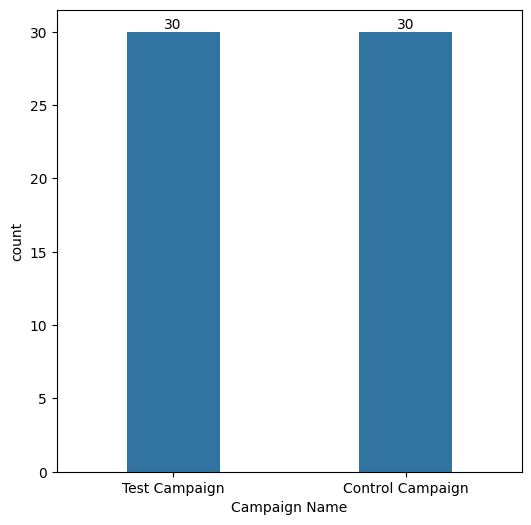

In [331]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x='Campaign Name', data=df_wrangled, ax = ax, width=0.4)
# add text labels, use int
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


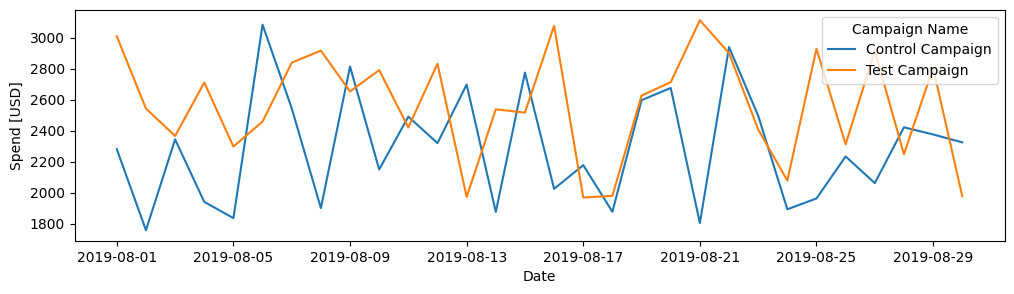

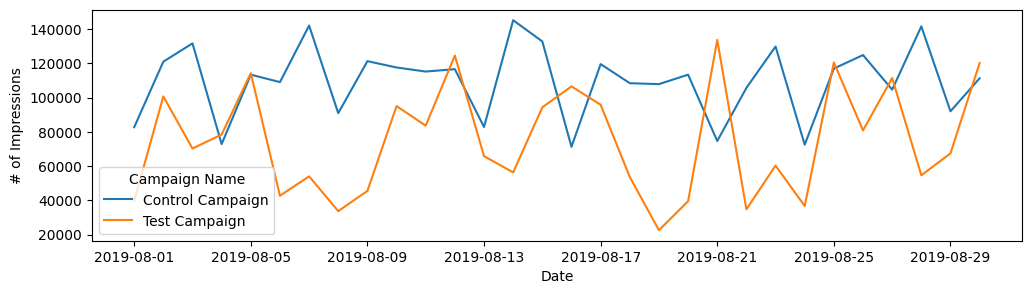

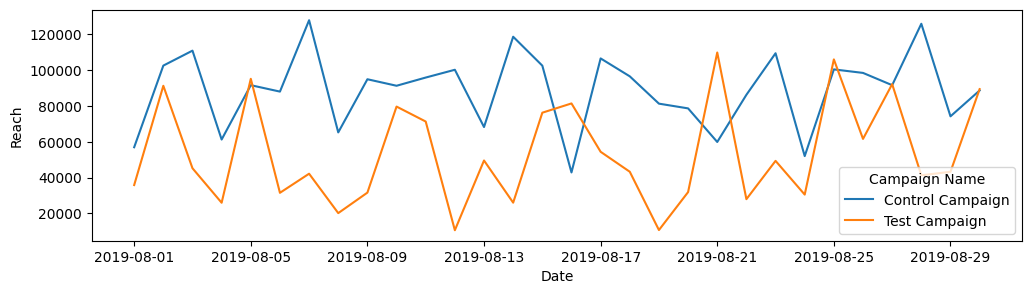

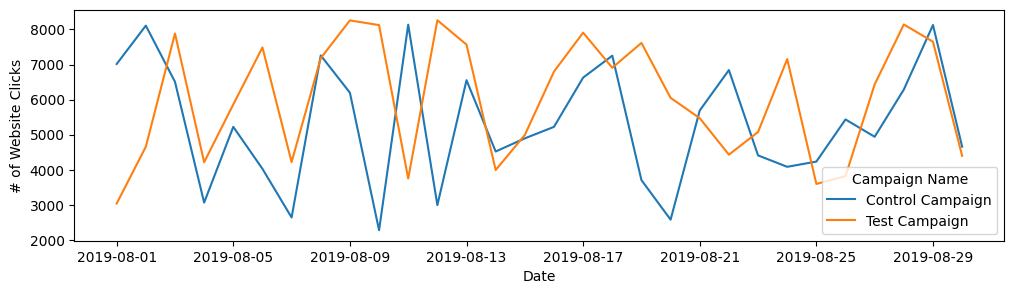

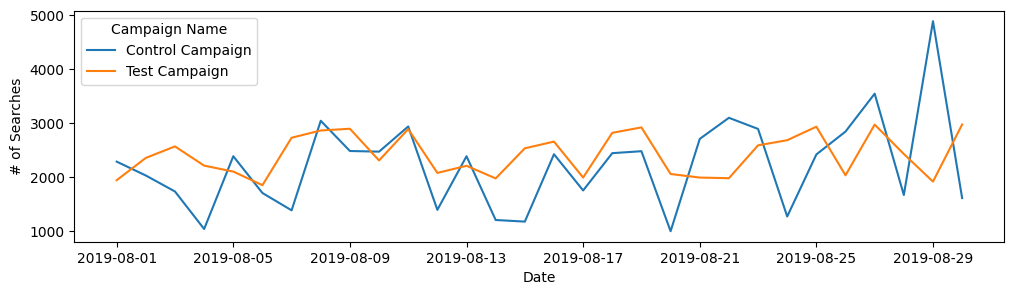

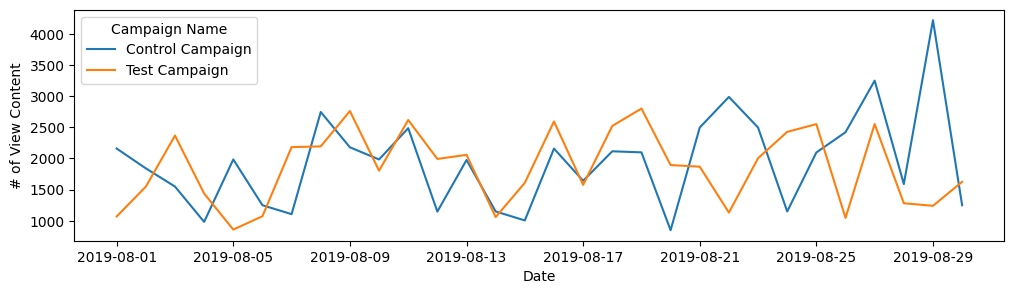

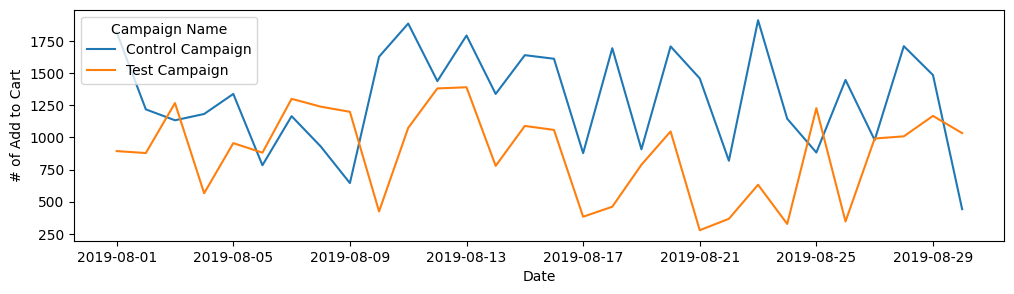

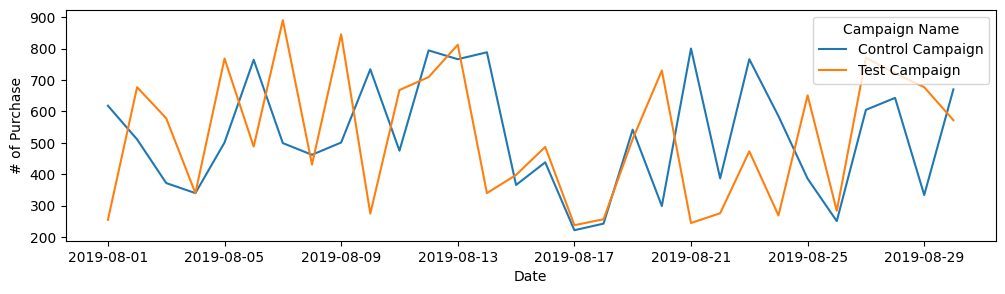

In [332]:
col_names = df_wrangled.columns
for col in col_names:
    if col not in ['Date', 'Campaign Name']:
        fig, ax = plt.subplots(figsize=(12, 3))
        sns.lineplot(x='Date', y=col, data=df_wrangled, ax = ax, hue='Campaign Name', hue_order=['Control Campaign', 'Test Campaign'])

Total of `Spend [USD]` is higher in Test Campaign
Total of `# of Impressions` is higher in Control Campaign
Total of `Reach` is higher in Control Campaign
Total of `# of Website Clicks` is higher in Test Campaign
Total of `# of Searches` is higher in Test Campaign
Total of `# of View Content` is higher in Control Campaign
Total of `# of Add to Cart` is higher in Control Campaign
Total of `# of Purchase` is higher in Control Campaign


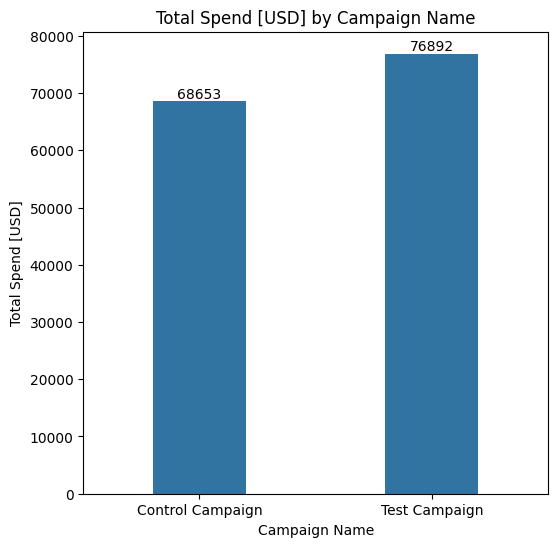

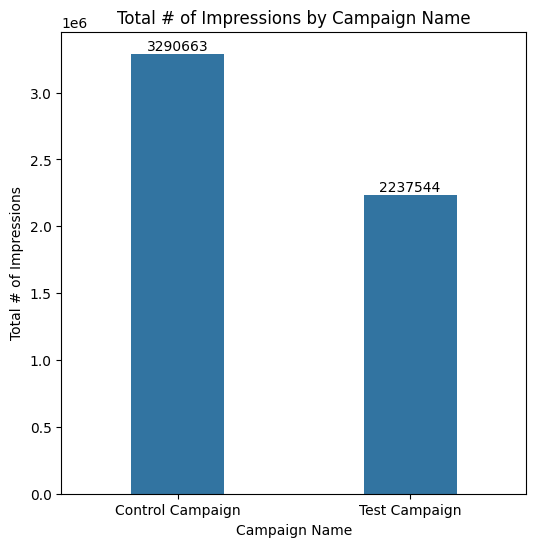

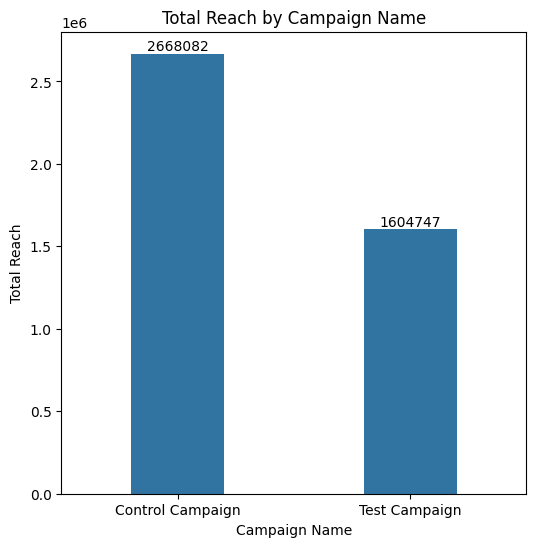

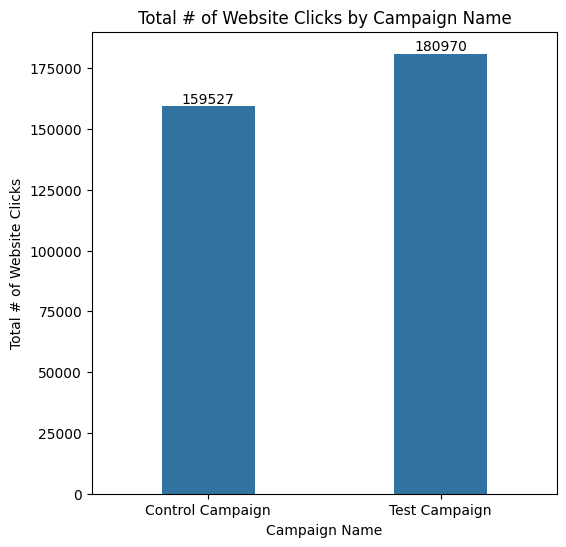

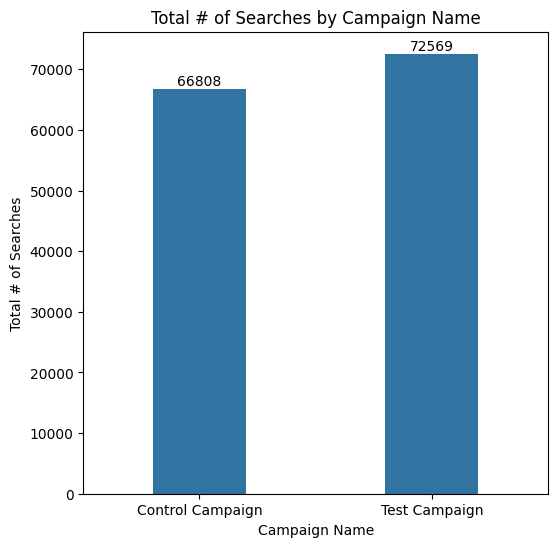

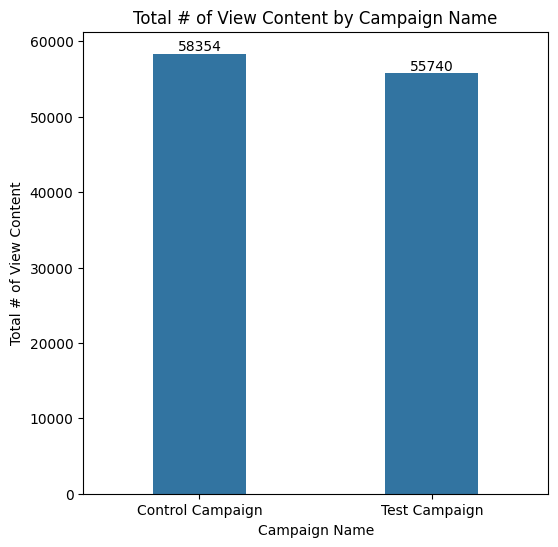

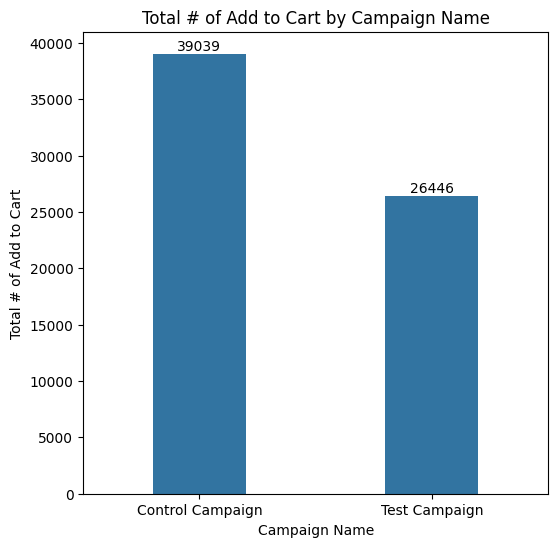

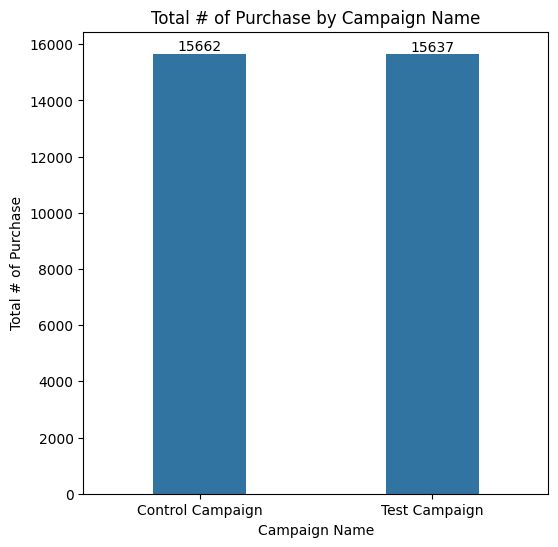

In [333]:
df_agg = df_wrangled.drop('Date', axis = 1).groupby('Campaign Name').sum()
for col in df_agg:
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.barplot(x=df_agg.index, y=col, data=df_agg, ax = ax, label=col,width=0.4, legend=None)
    ax.set_ylabel(f'Total {col}')
    ax.set_title(f'Total {col} by Campaign Name')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    if df_agg.loc['Control Campaign', col] >= df_agg.loc['Test Campaign', col]:
        print(f'Total of `{col}` is higher in Control Campaign')
    else:
        print(f'Total of `{col}` is higher in Test Campaign')

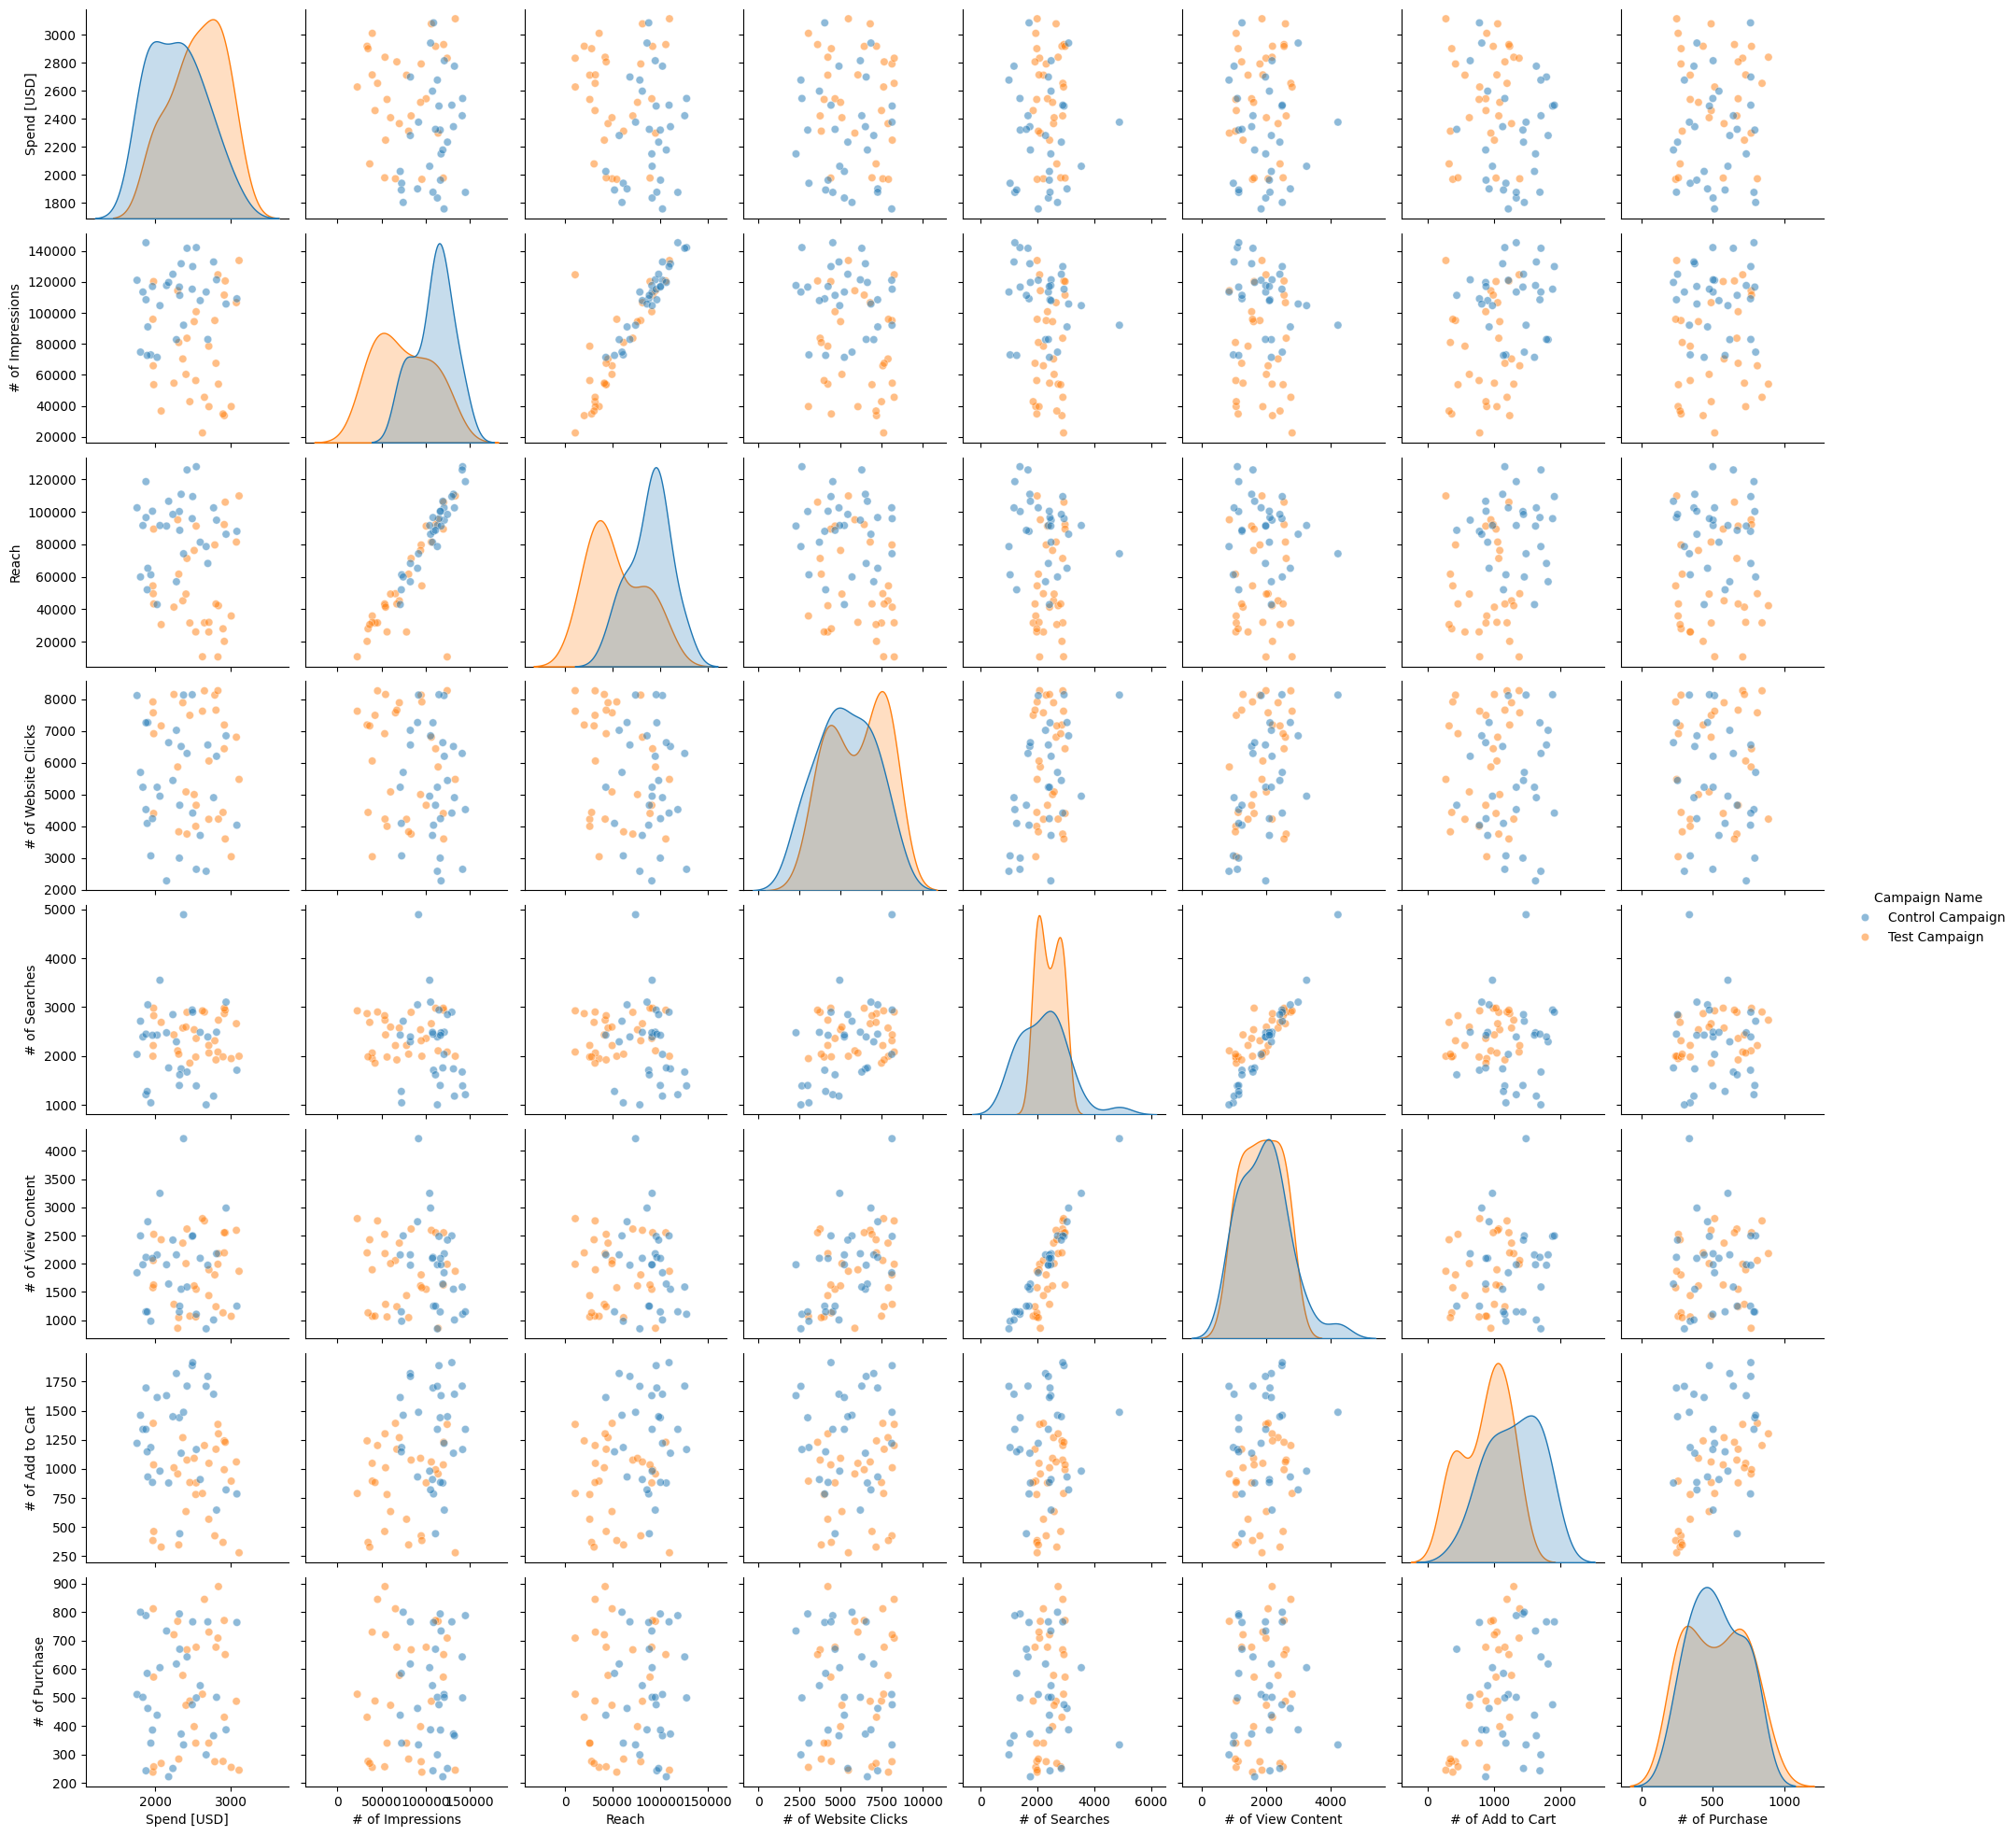

In [334]:
# Pairplot
sns.pairplot(df_wrangled, hue='Campaign Name', plot_kws={'alpha':0.5}, diag_kind = 'kde', kind = 'scatter', hue_order=['Control Campaign', 'Test Campaign']);

# Hypothesis Testing using Permutation Test

In [335]:
def perm_test(df, col, n=1000):
    """
    Perform a permutation test to calculate the distribution of mean differences 
    between test and control groups.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        col (str): The column on which the test is conducted.
        n (int): Number of permutations.

    Returns:
        list: Distribution of mean differences from permutations.
    """
    np.random.seed(0)  # Set seed for reproducibility

    # Ensure the column exists in the DataFrame
    if col not in df.columns:
        raise ValueError(f"Column '{col}' does not exist in the DataFrame.")

    # Count the sizes of the control and test groups
    counts = df['Campaign Name'].value_counts()
    if 'Control Campaign' not in counts or 'Test Campaign' not in counts:
        raise ValueError("Missing 'Control Campaign' or 'Test Campaign' in 'Campaign Name' column.")
    
    n_control = counts['Control Campaign']
    n_test = counts['Test Campaign']

    record_statistics = []

    for i in range(n):
        # Shuffle the DataFrame indices
        shuffled_indices = np.random.permutation(df.index)
        
        # Split into control and test groups
        control_indices = shuffled_indices[:n_control]
        test_indices = shuffled_indices[n_control:n_control + n_test]
        
        df_control = df.loc[control_indices]
        df_test = df.loc[test_indices]
        
        # Calculate mean difference
        mean_diff = df_test[col].mean() - df_control[col].mean()
        record_statistics.append(mean_diff)

    return record_statistics

def check_significance(p_value,h0,h1, significance_level = 0.05):
    if p_value < significance_level:
        print(f"The p-value {p_value} is less than/equal to the significance level of {significance_level}.")
        print(f"We can reject the null hypothesis: `{h0}`.")
        print(f"And accept the alternative hypothesis: `{h1}`.")
    else:
        print(f"The p-value {p_value} is greater than the significance level of {significance_level}.")
        print(f"We cannot reject the null hypothesis: `{h0}`.")

def compute_effect_size(df, col):
    df_agg = df.groupby('Campaign Name').agg({col: ['mean', lambda x: np.std(x, ddof=1)]})
    control_mean = df_agg.loc['Control Campaign', (col, 'mean')]
    test_mean = df_agg.loc['Test Campaign', (col, 'mean')]
    control_std = df_agg.loc['Control Campaign', (col, '<lambda_0>')]
    test_std = df_agg.loc['Test Campaign', (col, '<lambda_0>')]
    pooled_std = np.sqrt((control_std**2 + test_std**2) / 2)
    return (test_mean - control_mean) / pooled_std

## 1. Testing the effect of the marketing campaign in the number of purchase
- Null Hypothesis ($H_0$): the number of purchases in test group is equal or lower than control group
- Alternative Hypothesis ($H_1$): the number of purchases in test group is higher than control group

The p-value 0.512 is greater than the significance level of 0.05.
We cannot reject the null hypothesis: `the number of purchases in test group is equal or lower than control group`.
---------Confirming with t-test---------
p-value for single sided t-test: 0.5065
---------Compute the power---------
With 95% significance level, the probability of detecting a effect size (i.e., power) of -0.0042 of `# of Purchase`is 4.8352%


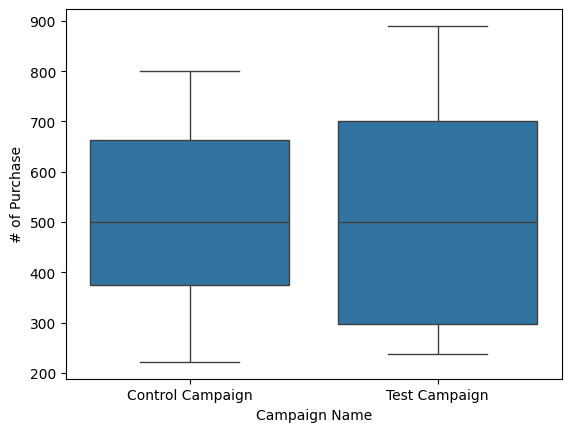

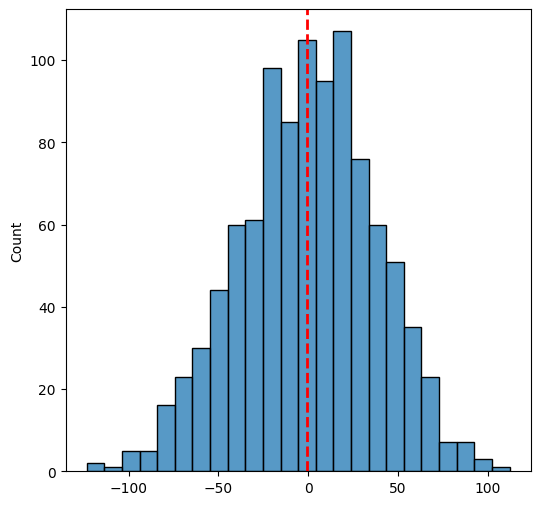

In [360]:
col_name = '# of Purchase'
null_hypothesis = 'the number of purchases in test group is equal or lower than control group'
alt_hypothesis = 'the number of purchases in test group is higher than control group'
sns.boxplot(x='Campaign Name', y=col_name, data=df_wrangled, order = ['Control Campaign', 'Test Campaign'])
observed_diff = df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'][col_name].mean() - df_wrangled[df_wrangled['Campaign Name'] == 'Control Campaign'][col_name].mean()
perm_diff = perm_test(df = df_wrangled, col = col_name, n = 1000)
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(perm_diff, ax = ax)
ax.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2)
p_value = sum(perm_diff > observed_diff) / len(perm_diff)
check_significance(p_value, h0 = null_hypothesis, h1 = alt_hypothesis)

# Confirm using t-test
print('---------Confirming with t-test---------')
res = stats.ttest_ind(df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'][col_name],
df_wrangled[df_wrangled['Campaign Name'] == 'Control Campaign'][col_name],
equal_var=False, alternative='greater')
print(f'p-value for single sided t-test: {res.pvalue :.4f}')

# Compute the probability of detecting the given effect size
print('---------Compute the power---------')
n_obs = len(df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'])
effect_size = compute_effect_size(df_wrangled, col_name)
analysis = sm.stats.TTestIndPower()
power = analysis.solve_power(effect_size=effect_size, nobs1 = n_obs,
alpha=0.05, alternative='larger')
print(f'With 95% significance level, the probability of detecting a effect size (i.e., power) of {effect_size:.4f} of `{col}`is {power:.4%}')

## 2. Testing the effect of the marketing campaign in the number of users who added products to the cart
- Null Hypothesis ($H_0$): the number of users who added products to the cart in test group is equal or lower than control group
- Alternative Hypothesis ($H_1$): the number of users who added products to the cart in test group is higher than control group

The p-value 1.0 is greater than the significance level of 0.05.
We cannot reject the null hypothesis: `the number of users who added products to the cart in test group is equal or lower than control group`.
---------Confirming with t-test---------
p-value for single sided t-test: 1.0000
---------Compute the power---------
With 95% significance level, the probability of detecting a effect size (i.e., power) of -1.1196 of `# of Purchase`is 0.0000%


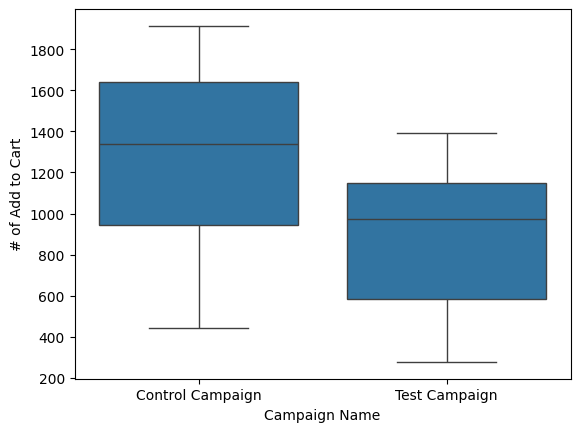

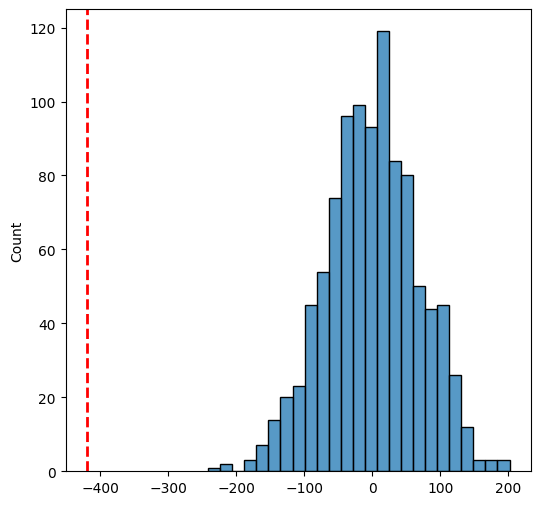

In [365]:
col_name = '# of Add to Cart'
null_hypothesis = 'the number of users who added products to the cart in test group is equal or lower than control group'
alt_hypothesis = 'the number of users who added products to the cart in test group is higher than control group'
sns.boxplot(x='Campaign Name', y=col_name, data=df_wrangled, order = ['Control Campaign', 'Test Campaign'])
observed_diff = df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'][col_name].mean() - df_wrangled[df_wrangled['Campaign Name'] == 'Control Campaign'][col_name].mean()
perm_diff = perm_test(df = df_wrangled, col = col_name, n = 1000)
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(perm_diff, ax = ax)
ax.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2)
p_value = sum(perm_diff > observed_diff) / len(perm_diff)
check_significance(p_value, h0 = null_hypothesis, h1 = alt_hypothesis)
# Confirm using t-test
print('---------Confirming with t-test---------')
res = stats.ttest_ind(df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'][col_name],
df_wrangled[df_wrangled['Campaign Name'] == 'Control Campaign'][col_name],
equal_var=False, alternative='greater')
print(f'p-value for single sided t-test: {res.pvalue :.4f}')
# Compute the probability of detecting the given effect size
print('---------Compute the power---------')
n_obs = len(df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'])
effect_size = compute_effect_size(df_wrangled, col_name)
analysis = sm.stats.TTestIndPower()
power = analysis.solve_power(effect_size=effect_size, nobs1 = n_obs,
alpha=0.05, alternative='larger')
print(f'With 95% significance level, the probability of detecting a effect size (i.e., power) of {effect_size:.4f} of `{col}`is {power:.4%}')

## 3. Testing the effect of the marketing campaign in the number of users who viewed content and products on the website
- Null Hypothesis ($H_0$): the number of users who viewed content and products on the website in test group is equal or lower than control group
- Alternative Hypothesis ($H_1$): the number of users who viewed content and products on the website in test group is higher than control group

The p-value 0.742 is greater than the significance level of 0.05.
We cannot reject the null hypothesis: `the number of users who viewed content and products on the website in test group is equal or lower than control group`.
---------Confirming with t-test---------
p-value for single sided t-test: 0.6877
---------Compute the power---------
With 95% significance level, the probability of detecting a effect size (i.e., power) of -0.1270 of `# of Purchase`is 1.6538%


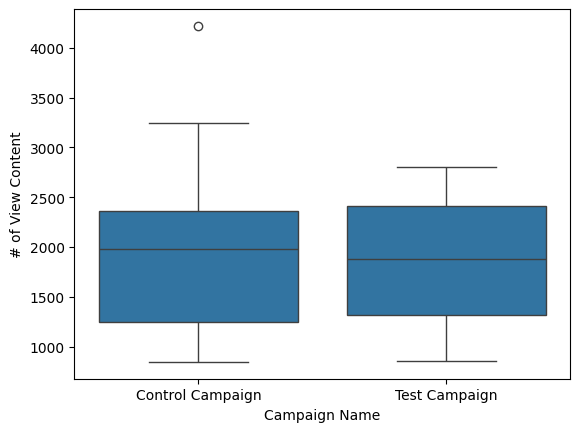

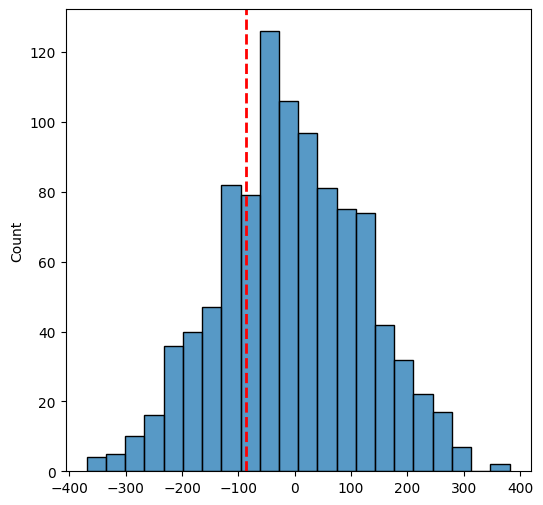

In [366]:
col_name = '# of View Content'
null_hypothesis = 'the number of users who viewed content and products on the website in test group is equal or lower than control group'
alt_hypothesis = 'the number of users who viewed content and products on the website in test group is higher than control group'

# Show the boxplot of the two groups
sns.boxplot(x='Campaign Name', y=col_name, data=df_wrangled, order = ['Control Campaign', 'Test Campaign'])

# Calculate the observed difference
observed_diff = df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'][col_name].mean() - df_wrangled[df_wrangled['Campaign Name'] == 'Control Campaign'][col_name].mean()

# Perform the permutation test
perm_diff = perm_test(df = df_wrangled, col = col_name, n = 1000)

# Plot the distribution of the mean differences
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(perm_diff, ax = ax)
ax.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2)

# Calculate the p-value and check for significance
p_value = sum(perm_diff > observed_diff) / len(perm_diff)
check_significance(p_value, h0 = null_hypothesis, h1 = alt_hypothesis)

# Confirm using t-test
print('---------Confirming with t-test---------')
res = stats.ttest_ind(df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'][col_name],
df_wrangled[df_wrangled['Campaign Name'] == 'Control Campaign'][col_name],
equal_var=False, alternative='greater')
print(f'p-value for single sided t-test: {res.pvalue :.4f}')

# Compute the probability of detecting the given effect size
print('---------Compute the power---------')
n_obs = len(df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'])
effect_size = compute_effect_size(df_wrangled, col_name)
analysis = sm.stats.TTestIndPower()
power = analysis.solve_power(effect_size=effect_size, nobs1 = n_obs,
alpha=0.05, alternative='larger')
print(f'With 95% significance level, the probability of detecting a effect size (i.e., power) of {effect_size:.4f} of `{col}`is {power:.4%}')

## 4. Testing the effect of the marketing campaign in the number of users who performed searches on the website
- Null Hypothesis ($H_0$): the number of users who performed searches on the website in test group is equal or lower than control group
- Alternative Hypothesis ($H_1$): the number of users who performed searches on the website in test group is higher than control group

The p-value 0.049 is less than/equal to the significance level of 0.05.
We can reject the null hypothesis: `the number of users who performed searches on the website in test group is equal or lower than control group`.
And accept the alternative hypothesis: `the number of users who performed searches on the website in test group is higher than control group`.
---------Confirming with t-test---------
p-value for single sided t-test: 0.1339
---------Compute the power---------
With 95% significance level, the probability of detecting a effect size (i.e., power) of 0.2901 of `# of Purchase`is 29.6545%


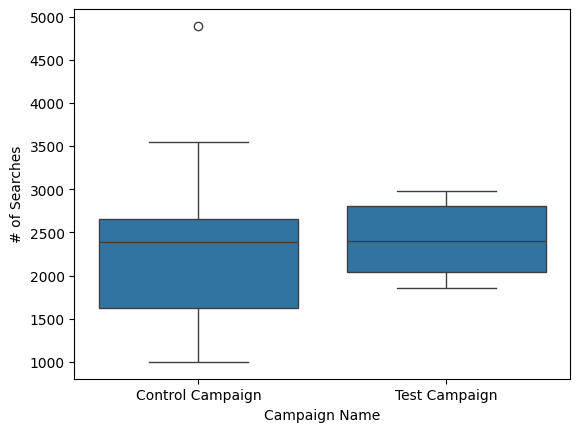

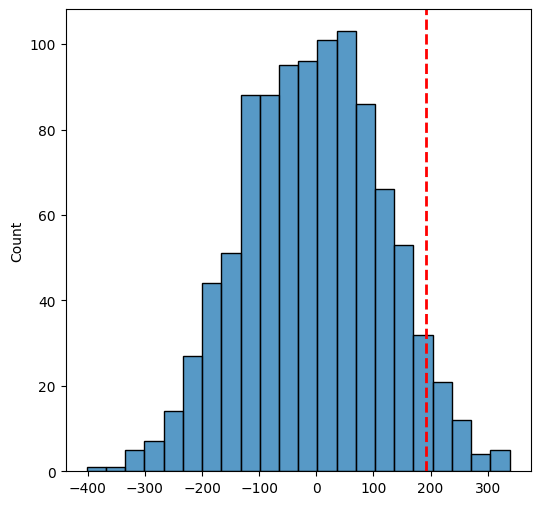

In [367]:
col_name = '# of Searches'
null_hypothesis = 'the number of users who performed searches on the website in test group is equal or lower than control group'
alt_hypothesis = 'the number of users who performed searches on the website in test group is higher than control group'

# Show the boxplot of the two groups
sns.boxplot(x='Campaign Name', y=col_name, data=df_wrangled, order = ['Control Campaign', 'Test Campaign'])

# Calculate the observed difference
observed_diff = df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'][col_name].mean() - df_wrangled[df_wrangled['Campaign Name'] == 'Control Campaign'][col_name].mean()

# Perform the permutation test
perm_diff = perm_test(df = df_wrangled, col = col_name, n = 1000)

# Plot the distribution of the mean differences
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(perm_diff, ax = ax)
ax.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2)

# Calculate the p-value and check for significance
p_value = sum(perm_diff > observed_diff) / len(perm_diff)
check_significance(p_value, h0 = null_hypothesis, h1 = alt_hypothesis)

# Confirm using t-test
print('---------Confirming with t-test---------')
res = stats.ttest_ind(df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'][col_name],
df_wrangled[df_wrangled['Campaign Name'] == 'Control Campaign'][col_name],
equal_var=False, alternative='greater')
print(f'p-value for single sided t-test: {res.pvalue :.4f}')

# Compute the probability of detecting the given effect size
print('---------Compute the power---------')
n_obs = len(df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'])
effect_size = compute_effect_size(df_wrangled, col_name)
analysis = sm.stats.TTestIndPower()
power = analysis.solve_power(effect_size=effect_size, nobs1 = n_obs,
alpha=0.05, alternative='larger')
print(f'With 95% significance level, the probability of detecting a effect size (i.e., power) of {effect_size:.4f} of `{col}`is {power:.4%}')

## 5. Testing the effect of the marketing campaign in the number of website clicks received through the ads
- Null Hypothesis ($H_0$): the number of website clicks received through the ads in test group is equal or lower than control group
- Alternative Hypothesis ($H_1$): the number of website clicks received through the ads in test group is higher than control group

The p-value 0.011 is less than/equal to the significance level of 0.05.
We can reject the null hypothesis: `the number of users who performed searches on the website in test group is equal or lower than control group`.
And accept the alternative hypothesis: `the number of users who performed searches on the website in test group is higher than control group`.
---------Confirming with t-test---------
p-value for single sided t-test: 0.0562
---------Compute the power---------
With 95% significance level, the probability of detecting a effect size (i.e., power) of 0.4161 of `# of Purchase`is 47.9217%


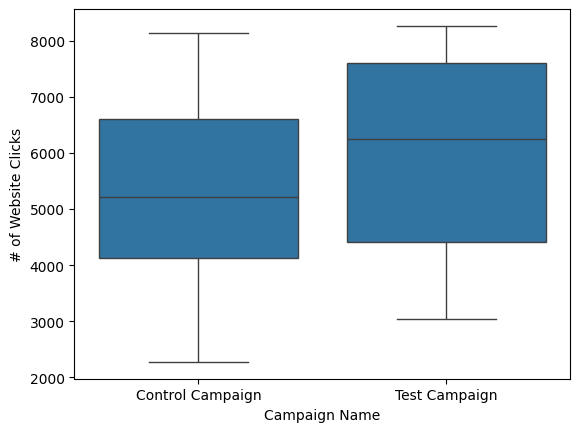

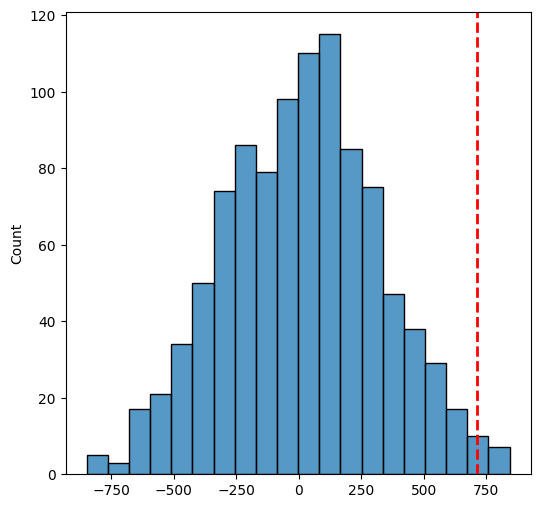

In [368]:
col_name = '# of Website Clicks'
null_hypothesis = 'the number of users who performed searches on the website in test group is equal or lower than control group'
alt_hypothesis = 'the number of users who performed searches on the website in test group is higher than control group'

# Show the boxplot of the two groups
sns.boxplot(x='Campaign Name', y=col_name, data=df_wrangled, order = ['Control Campaign', 'Test Campaign'])

# Calculate the observed difference
observed_diff = df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'][col_name].mean() - df_wrangled[df_wrangled['Campaign Name'] == 'Control Campaign'][col_name].mean()

# Perform the permutation test
perm_diff = perm_test(df = df_wrangled, col = col_name, n = 1000)

# Plot the distribution of the mean differences
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(perm_diff, ax = ax)
ax.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2)

# Calculate the p-value and check for significance
p_value = sum(perm_diff > observed_diff) / len(perm_diff)
check_significance(p_value, h0 = null_hypothesis, h1 = alt_hypothesis)

# Confirm using t-test
print('---------Confirming with t-test---------')
res = stats.ttest_ind(df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'][col_name],
df_wrangled[df_wrangled['Campaign Name'] == 'Control Campaign'][col_name],
equal_var=False, alternative='greater')
print(f'p-value for single sided t-test: {res.pvalue :.4f}')

# Compute the probability of detecting the given effect size
print('---------Compute the power---------')
n_obs = len(df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'])
effect_size = compute_effect_size(df_wrangled, col_name)
analysis = sm.stats.TTestIndPower()
power = analysis.solve_power(effect_size=effect_size, nobs1 = n_obs,
alpha=0.05, alternative='larger')
print(f'With 95% significance level, the probability of detecting a effect size (i.e., power) of {effect_size:.4f} of `{col}`is {power:.4%}')

## 6. Testing the effect of the marketing campaign in the number of unique impressions received in the ad
- Null Hypothesis ($H_0$): the number of unique impressions received in the ad in test group is equal or lower than control group
- Alternative Hypothesis ($H_1$): the number of unique impressions received in the ad in test group is higher than control group

The p-value 1.0 is greater than the significance level of 0.05.
We cannot reject the null hypothesis: `the number of unique impressions received in the ad in test group is equal or lower than control group`.
---------Confirming with t-test---------
p-value for single sided t-test: 1.0000
---------Compute the power---------
With 95% significance level, the probability of detecting a effect size (i.e., power) of -1.3958 of `# of Purchase`is 0.0000%


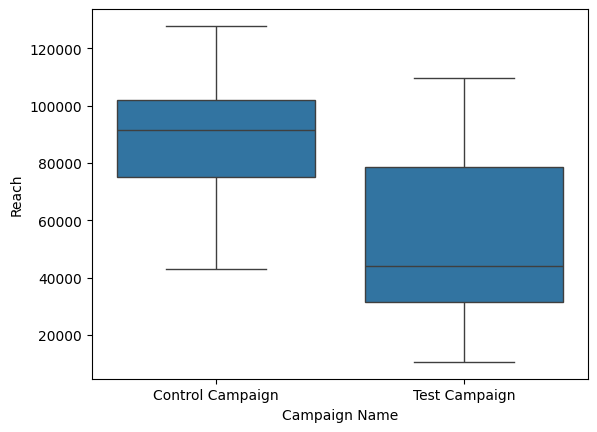

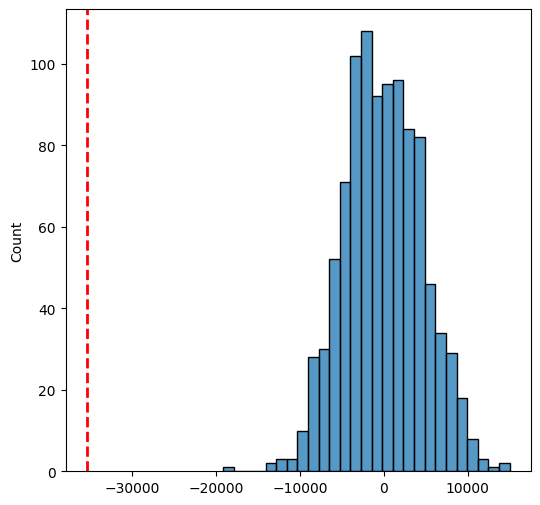

In [369]:
col_name = 'Reach'
null_hypothesis = 'the number of unique impressions received in the ad in test group is equal or lower than control group'
alt_hypothesis = 'the number of unique impressions received in the ad in test group is higher than control group'

# Show the boxplot of the two groups
sns.boxplot(x='Campaign Name', y=col_name, data=df_wrangled, order = ['Control Campaign', 'Test Campaign'])

# Calculate the observed difference
observed_diff = df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'][col_name].mean() - df_wrangled[df_wrangled['Campaign Name'] == 'Control Campaign'][col_name].mean()

# Perform the permutation test
perm_diff = perm_test(df = df_wrangled, col = col_name, n = 1000)

# Plot the distribution of the mean differences
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(perm_diff, ax = ax)
ax.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2)

# Calculate the p-value and check for significance
p_value = sum(perm_diff > observed_diff) / len(perm_diff)
check_significance(p_value, h0 = null_hypothesis, h1 = alt_hypothesis)

# Confirm using t-test
print('---------Confirming with t-test---------')
res = stats.ttest_ind(df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'][col_name],
df_wrangled[df_wrangled['Campaign Name'] == 'Control Campaign'][col_name],
equal_var=False, alternative='greater')
print(f'p-value for single sided t-test: {res.pvalue :.4f}')

# Compute the probability of detecting the given effect size
print('---------Compute the power---------')
n_obs = len(df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'])
effect_size = compute_effect_size(df_wrangled, col_name)
analysis = sm.stats.TTestIndPower()
power = analysis.solve_power(effect_size=effect_size, nobs1 = n_obs,
alpha=0.05, alternative='larger')
print(f'With 95% significance level, the probability of detecting a effect size (i.e., power) of {effect_size:.4f} of `{col}`is {power:.4%}')

## 7. Testing the effect of the marketing campaign in the number of impressions the ad crossed through the campaign
- Null Hypothesis ($H_0$): the number of impressions the ad crossed through the campaign in test group is equal or lower than control group
- Alternative Hypothesis ($H_1$): the number of impressions the ad crossed through the campaign in test group is higher than control group

The p-value 1.0 is greater than the significance level of 0.05.
We cannot reject the null hypothesis: `the number of impressions the ad crossed through the campaign in test group is equal or lower than control group`.
---------Confirming with t-test---------
p-value for single sided t-test: 1.0000
---------Compute the power---------
With 95% significance level, the probability of detecting a effect size (i.e., power) of -1.2876 of `# of Purchase`is 0.0000%


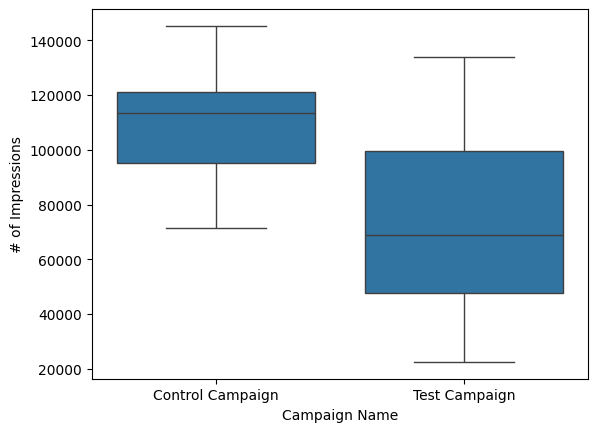

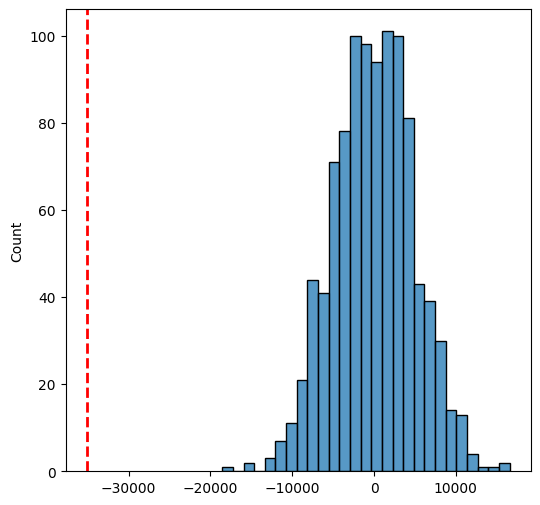

In [370]:
col_name = '# of Impressions'
null_hypothesis = 'the number of impressions the ad crossed through the campaign in test group is equal or lower than control group'
alt_hypothesis = 'the number of impressions the ad crossed through the campaign in test group is higher than control group'

# Show the boxplot of the two groups
sns.boxplot(x='Campaign Name', y=col_name, data=df_wrangled, order = ['Control Campaign', 'Test Campaign'])

# Calculate the observed difference
observed_diff = df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'][col_name].mean() - df_wrangled[df_wrangled['Campaign Name'] == 'Control Campaign'][col_name].mean()

# Perform the permutation test
perm_diff = perm_test(df = df_wrangled, col = col_name, n = 1000)

# Plot the distribution of the mean differences
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(perm_diff, ax = ax)
ax.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2)

# Calculate the p-value and check for significance
p_value = sum(perm_diff > observed_diff) / len(perm_diff)
check_significance(p_value, h0 = null_hypothesis, h1 = alt_hypothesis)

# Confirm using t-test
print('---------Confirming with t-test---------')
res = stats.ttest_ind(df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'][col_name],
df_wrangled[df_wrangled['Campaign Name'] == 'Control Campaign'][col_name],
equal_var=False, alternative='greater')
print(f'p-value for single sided t-test: {res.pvalue :.4f}')

# Compute the probability of detecting the given effect size
print('---------Compute the power---------')
n_obs = len(df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'])
effect_size = compute_effect_size(df_wrangled, col_name)
analysis = sm.stats.TTestIndPower()
power = analysis.solve_power(effect_size=effect_size, nobs1 = n_obs,
alpha=0.05, alternative='larger')
print(f'With 95% significance level, the probability of detecting a effect size (i.e., power) of {effect_size:.4f} of `{col}`is {power:.4%}')

## 8. Testing the effect of the marketing campaign in the amount spent on the campaign in dollars
- Null Hypothesis ($H_0$): the amount spent on the campaign in dollars in test group is equal or lower than control group
- Alternative Hypothesis ($H_1$): amount spent on the campaign in dollars in test group is higher than control group

The p-value 0.0 is less than/equal to the significance level of 0.05.
We can reject the null hypothesis: `the amount spent on the campaign in dollars in test group is equal or lower than control group`.
And accept the alternative hypothesis: `the amount spent on the campaign in dollars in test group is higher than control group`.
---------Confirming with t-test---------
p-value for single sided t-test: 0.0022
---------Compute the power---------
With 95% significance level, the probability of detecting a effect size (i.e., power) of 0.7668 of `# of Purchase`is 90.1511%


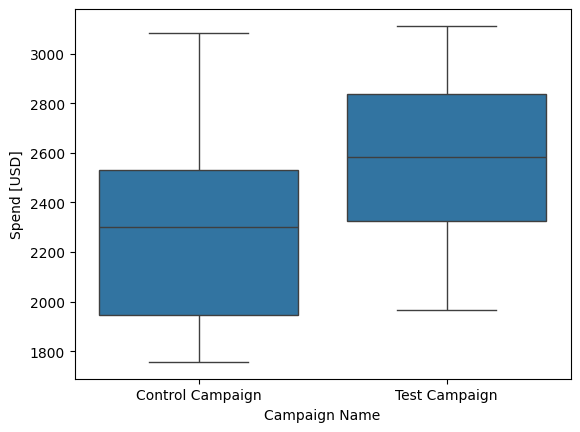

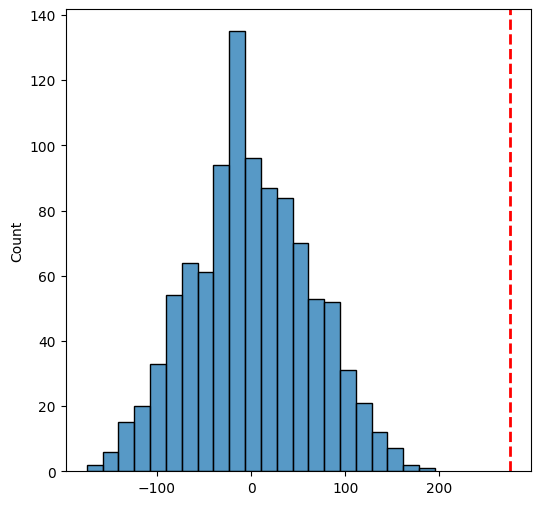

In [371]:
col_name = 'Spend [USD]'
null_hypothesis = 'the amount spent on the campaign in dollars in test group is equal or lower than control group'
alt_hypothesis = 'the amount spent on the campaign in dollars in test group is higher than control group'

# Show the boxplot of the two groups
sns.boxplot(x='Campaign Name', y=col_name, data=df_wrangled, order = ['Control Campaign', 'Test Campaign'])

# Calculate the observed difference
observed_diff = df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'][col_name].mean() - df_wrangled[df_wrangled['Campaign Name'] == 'Control Campaign'][col_name].mean()

# Perform the permutation test
perm_diff = perm_test(df = df_wrangled, col = col_name, n = 1000)

# Plot the distribution of the mean differences
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(perm_diff, ax = ax)
ax.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2)

# Calculate the p-value and check for significance
p_value = sum(perm_diff > observed_diff) / len(perm_diff)
check_significance(p_value, h0 = null_hypothesis, h1 = alt_hypothesis)

# Confirm using t-test
print('---------Confirming with t-test---------')
res = stats.ttest_ind(df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'][col_name],
df_wrangled[df_wrangled['Campaign Name'] == 'Control Campaign'][col_name],
equal_var=False, alternative='greater')
print(f'p-value for single sided t-test: {res.pvalue :.4f}')

# Compute the probability of detecting the given effect size
print('---------Compute the power---------')
n_obs = len(df_wrangled[df_wrangled['Campaign Name'] == 'Test Campaign'])
effect_size = compute_effect_size(df_wrangled, col_name)
analysis = sm.stats.TTestIndPower()
power = analysis.solve_power(effect_size=effect_size, nobs1 = n_obs,
alpha=0.05, alternative='larger')
print(f'With 95% significance level, the probability of detecting a effect size (i.e., power) of {effect_size:.4f} of `{col}`is {power:.4%}')

# Summary
- Based on EDA:
  - During the test period, the data shows that although more money is spent in total, the Test Campaign only witness a small increase the number of  `# of Website Clicks` and `# of Searches`
  - In addition, it seems there is no significant difference in the number of `# of Purchases`, which is the key metric for evaluating the success of the campaign

- Further investigation by using the hypothesis testing:
  - Only the `# of Website Clicks` and `# of Searches` show a significant difference (i.e., larger) between the test and control group
  - However, with the given sample size, the probability (i.e., power) of observing the difference in the number of `# of Website Clicks` and `# of Searches` is not too high (i.e., ~48% and and ~27% respectively)
  - The other metrics do not show a significant difference between the test and control group

# Conclusion
- Therefore, the marketing campaign does not seem to be effective in increasing the number of purchases, users who added products to the cart, users who viewed content and products on the website, and the number of unique impressions received in the ad
- The marketing campaign only seems to be effective in increasing the number of website clicks and the number of searches on the website
- The company should consider revising the marketing campaign strategy to increase the number of purchases, users who added products to the cart, and users who viewed content and products on the website
- In addition, for achieving a more robust hypothesis testing results, the number of samples should be increased based on a predefined power and effect size before conducting the test